In [93]:
import numpy as np
from numpy import fft,pi
import scipy.signal

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import ps_utils_new
import imp
imp.reload(ps_utils_new)
from ps_utils_new import Image
from plot_styling import dark

In [94]:
matplotlib.rcParams.update({'font.size': 18})
plt.rc('font', family='Arial')
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

In [95]:
analysis_root = '/volumes/abraham/xcor_data/analysis/'
analysis_names = ['0372I','0372I_0373I_0374I_0375I_0376I']
num_frames = len(analysis_names)

images_mask_artifacts = [Image(analysis_root+analysis_name+'/'+analysis_name+'_mask_artifacts_coarse.fits') for analysis_name in analysis_names]
images_mask_artifacts_sources = [Image(analysis_root+analysis_name+'/'+analysis_name+'_mask_artifacts_sources_coarse.fits') for analysis_name in analysis_names]

loading /volumes/abraham/xcor_data/analysis/0372I/0372I_mask_artifacts_coarse.fits
[  3.07084799e+02   1.16871988e-02   3.19067547e-02   1.63580584e-02
  -1.00000000e-01  -2.00151729e-04   7.37093123e-02  -9.31309901e-03
  -3.62893327e-03]
loading /volumes/abraham/xcor_data/analysis/0372I_0373I_0374I_0375I_0376I/0372I_0373I_0374I_0375I_0376I_mask_artifacts_coarse.fits
[  3.10000000e+02   2.51674917e-02   1.10345604e-02  -1.39079903e-02
  -5.45939520e-02  -8.49006883e-03   4.47945486e-02   9.57443482e-03
  -8.19472824e-03]
loading /volumes/abraham/xcor_data/analysis/0372I/0372I_mask_artifacts_sources_coarse.fits
[  3.05069747e+02   1.11483355e-02   1.79886994e-02   1.50268932e-02
  -4.31045939e-02   1.23266485e-03   8.08162617e-02  -1.74740404e-02
  -3.89042239e-02]
loading /volumes/abraham/xcor_data/analysis/0372I_0373I_0374I_0375I_0376I/0372I_0373I_0374I_0375I_0376I_mask_artifacts_sources_coarse.fits
[  3.08421695e+02   2.43843081e-02  -1.75330420e-02  -1.38912730e-02
   4.36814194e-0

In [96]:
# n = images_mask_artifacts_sources[0].n
# order = 4

# def func(ind, *c):
#     xi = 1.*(ind % n)/n-.5
#     yi = 1.*(np.int32(ind/n))/n-.5

#     xcoefs = c[1:1+order]
#     ycoefs = c[1+order:]

#     xpoly = 1 + np.sum([xcoefs[i]*(xi**(i+1)) for i in range(order)],axis=0)
#     ypoly = 1 + np.sum([ycoefs[i]*(yi**(i+1)) for i in range(order)],axis=0)

#     return xpoly*ypoly * c[0]  

# inds = np.arange(n**2)
# chisq = lambda p0: np.sum((func(inds,*p0)-images_mask_artifacts_sources[0].frame_rawADU.flatten())**2)

# param_bounds = [(290,310)]+[(-5,5)]*(2*order)

# result = scipy.optimize.differential_evolution(chisq, param_bounds, polish=True)
# popt = result['x']
# print(popt)

In [97]:
# plt.imshow(images_mask_artifacts_sources[0].frame_rawADU,interpolation='nearest')
# plt.colorbar()

In [98]:
# plt.figure(figsize=(12,5))

# plt.subplot(121)
# plt.imshow(images_mask_artifacts_sources[0].frame_rawADU,interpolation='nearest',vmin=300,vmax=315)
# plt.colorbar()

# plt.subplot(122)
# popt = [305,0,0,0,0,0,0,0,0]
# plt.imshow(np.reshape(func(inds,*popt),(n,n)),interpolation='nearest',vmin=300,vmax=315)
# plt.colorbar()

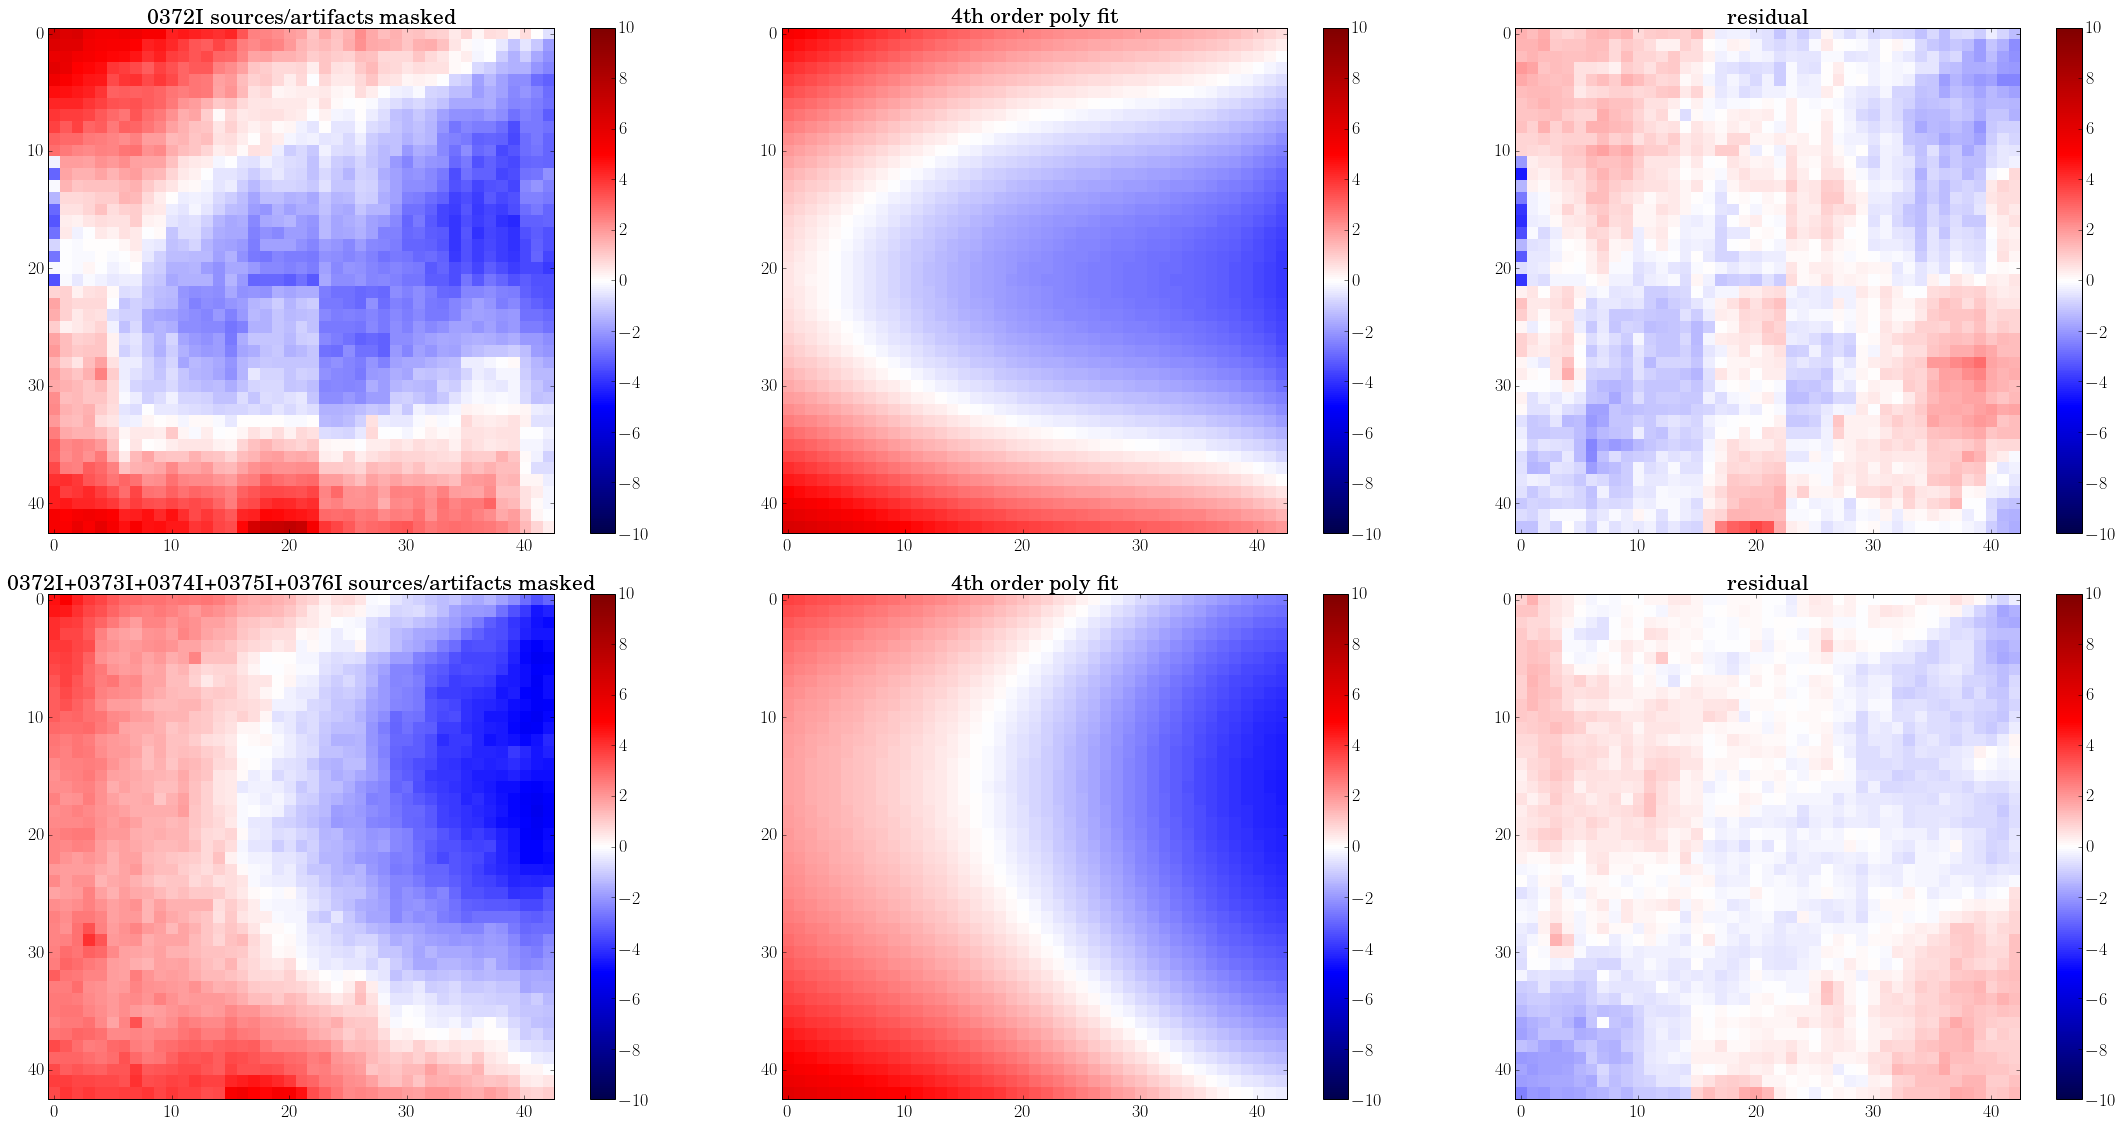

In [99]:
v1=-10
v2=10

def flipudlr(m):
    return np.flipud(np.fliplr(m))

plt.figure(figsize=(32,16))

plt.subplot(231)
plt.imshow(flipudlr(images_mask_artifacts_sources[0].frame_rawADU)-images_mask_artifacts_sources[0].frame_rawADU.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title(analysis_names[0].replace('_','+')+' sources/artifacts masked')

plt.subplot(232)
plt.imshow(flipudlr(images_mask_artifacts_sources[0].model_frame_rawADU)-images_mask_artifacts_sources[0].model_frame_rawADU.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title('4th order poly fit')

plt.subplot(233)
plt.imshow(flipudlr(images_mask_artifacts_sources[0].res_frame_rawADU),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title('residual')


plt.subplot(234)
plt.imshow(flipudlr(images_mask_artifacts_sources[1].frame_rawADU)-images_mask_artifacts_sources[1].frame_rawADU.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title(analysis_names[1].replace('_','+')+' sources/artifacts masked')

plt.subplot(235)
plt.imshow(flipudlr(images_mask_artifacts_sources[1].model_frame_rawADU-images_mask_artifacts_sources[1].model_frame_rawADU.mean()),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title('4th order poly fit')

plt.subplot(236)
plt.imshow(flipudlr(images_mask_artifacts_sources[1].res_frame_rawADU),vmin=v1,vmax=v2,interpolation='nearest',cmap='seismic')
plt.colorbar()
plt.title('residual')

plt.tight_layout()
plt.savefig('stacking_and_polyfit_comparison.png',bbox_inches='tight')

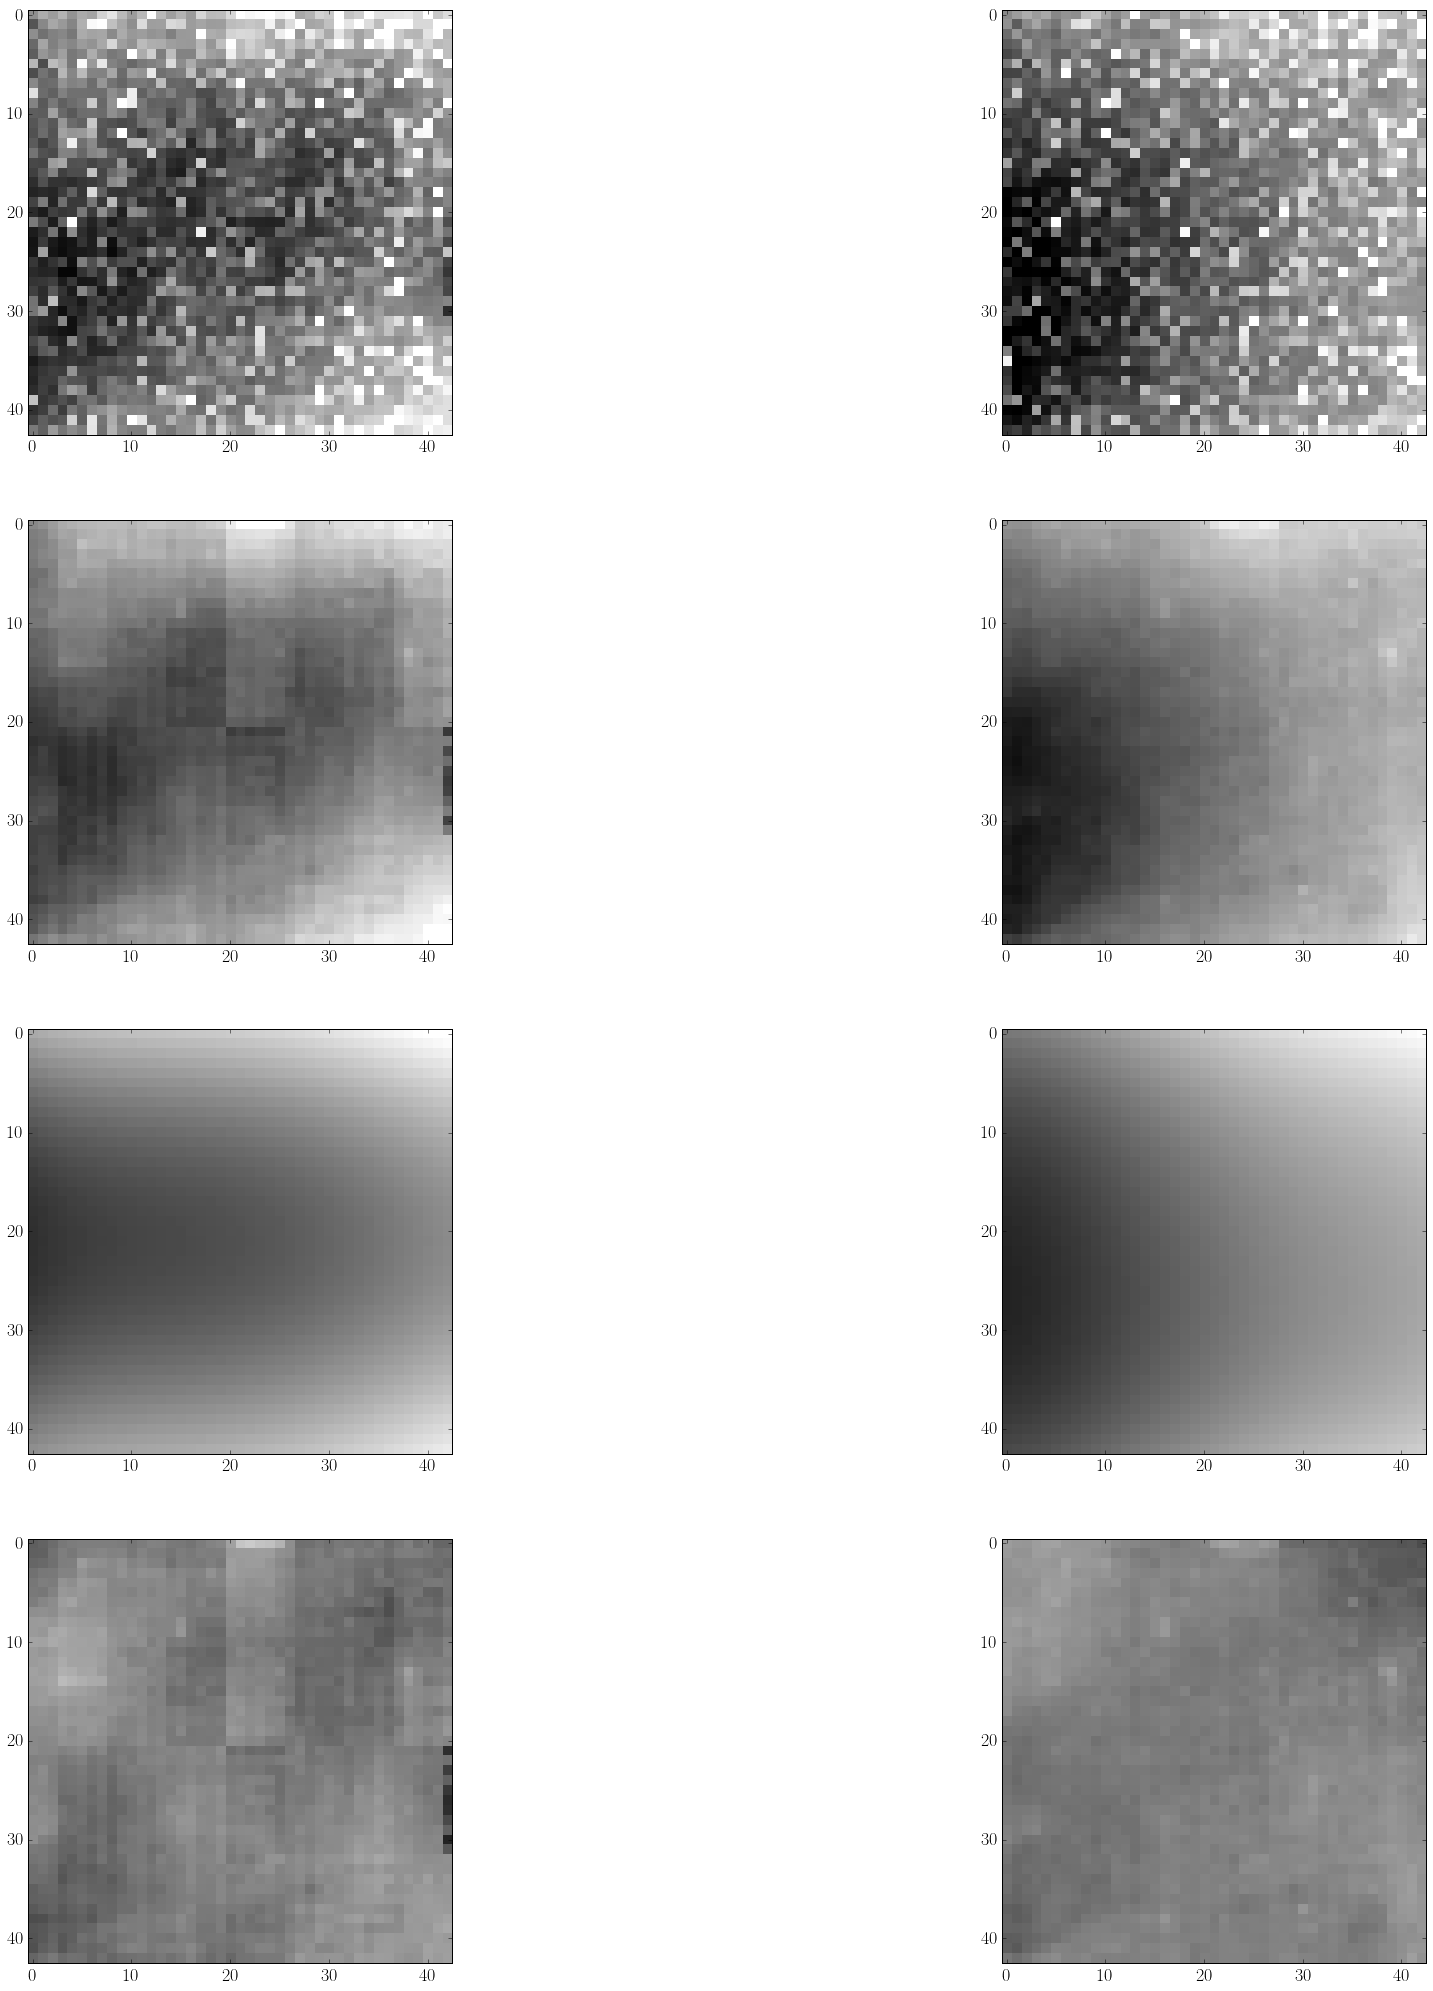

In [11]:
v1=-60
v2=60

cm = 'gray'

plt.figure(figsize=(32,35))
for framei in range(num_frames):
    plt.subplot(4,num_frames,framei+1)
    plt.imshow(images_mask_artifacts[framei].frame_kjy_per_sr-images_mask_artifacts[framei].frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].frame_kjy_per_sr-images_mask_artifacts_sources[framei].frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,2*num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].model_frame_kjy_per_sr-images_mask_artifacts_sources[framei].model_frame_kjy_per_sr.mean(),vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    
    plt.subplot(4,num_frames,3*num_frames+framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)

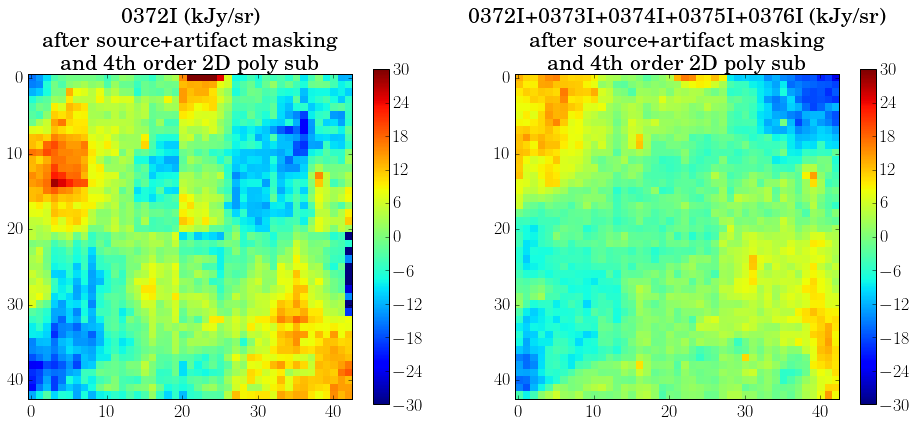

In [46]:
v1=-30
v2=30

cm = 'jet'

plt.figure(figsize=(16,6))
for framei in range(num_frames):
    plt.subplot(1,num_frames,framei+1)
    plt.imshow(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr,vmin=v1,vmax=v2,interpolation='nearest',cmap=cm)
    plt.colorbar()
    plt.title(analysis_names[framei].replace('_','+')+' (kJy/sr)\n after source+artifact masking\n and 4th order 2D poly sub')

In [13]:
# LOAD LITERATURE IR POWER SPECTRA (Zemcov+ 14)

d = '/Users/abrahamn/Documents/MIT/21cm/21cmIR/2016/may/zemcov14_data/'
ell_Cell_ciber = genfromtxt(d+'zemcov14_CIBER_data_Cl.txt',skip_header=1,delimiter=',')
ell_Cell_eormodel = genfromtxt(d+'zemcov14_eor_Cl.txt',skip_header=1,delimiter=',')

# these are in nW/m^2/sr, but I want to convert them to kJy/sr
# I have to divide by the bandwidth of 0.5um
lamda_m = 1.1e-6
freq_Hz = 3.e8/lamda_m
convert_to_kJy_per_sr = 1.e-9/freq_Hz/(1.e3*1.e-26)

ell_Cell_ciber[:,1] *= convert_to_kJy_per_sr
ell_Cell_eormodel[:,1] *= convert_to_kJy_per_sr

In [14]:
# # LOOKING FOR SYSTEMATICS IN 2D FOURIER SPACE

# v1,v2 = 0,5

# plt.figure(figsize=(36,20))
# for framei in range(num_frames):
#     plt.subplot(3,num_frames,framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()
    
#     plt.subplot(3,num_frames,num_frames+framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts_sources[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()
    
#     plt.subplot(3,num_frames,2*num_frames+framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(images_mask_artifacts_sources[framei].res_frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()

In [15]:
# w = scipy.signal.hann(images_mask_artifacts[0].n)
# wx,wy = np.meshgrid(w,w)
# w2 = wx*wy

# # LOOKING FOR SYSTEMATICS IN 2D FOURIER SPACE

# v1,v2 = 0,5

# plt.figure(figsize=(36,20))
# for framei in range(num_frames):
#     plt.subplot(3,num_frames,framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()
    
#     plt.subplot(3,num_frames,num_frames+framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts_sources[framei].frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()
    
#     plt.subplot(3,num_frames,2*num_frames+framei+1)
#     plt.imshow(np.log10(np.abs(fft.fftshift(fft.fft2(w2*images_mask_artifacts_sources[framei].res_frame_kjy_per_sr)))),interpolation='nearest',vmin=v1,vmax=v2)
#     plt.colorbar()

In [16]:
nbins = 15
lmax = 2000

img.mean() = 3.55017936547e-05
img.mean() = 2.55815866023e-05
img.mean() = -9.58153422035e-05
img.mean() = -0.000106686074656


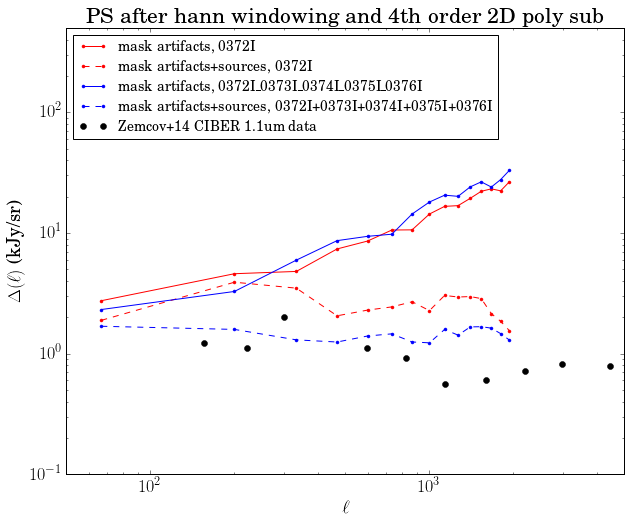

In [40]:
# MASKING STUDY: COMPARING POWER SPECTRA

imp.reload(ps_utils_new)

plt.figure(figsize=(10,8))
cols=['r','b']

for framei in range(num_frames):
    if framei > 0: legendlabels = ['','','','','','','']
    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts[framei],nbins,lmax,backsub=True,hann=True,use_res_image=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),cols[framei]+'.-',label='mask artifacts, '+analysis_names[framei].replace('_','\_'))

    
    lbins,Cl,counts = ps_utils_new.image2PS(images_mask_artifacts_sources[framei],nbins,lmax,backsub=True,hann=True,use_res_image=True)
    plt.loglog(lbins,sqrt(lbins**2*Cl/(2*pi)),cols[framei]+'.--',label='mask artifacts+sources, '+analysis_names[framei].replace('_','+'))
    
plt.loglog(ell_Cell_ciber[:,0],ell_Cell_ciber[:,1],'ko',label='Zemcov+14 CIBER 1.1um data')
#plt.loglog(ell_Cell_eormodel[:,0],ell_Cell_eormodel[:,1],'k--',label='Zemcov+14 EOR theory')

plt.xlabel(ur'$\ell$')
plt.ylabel(ur'$\Delta(\ell)$ \text{(kJy/sr)}')
plt.xlim([50,5000])
plt.ylim([.1,500])
plt.title('PS after hann windowing and 4th order 2D poly sub')
plt.legend(fontsize=14,loc=2)

#dark(title='Power spectra of ATLAS I band frames',fontsize=18)

#plt.savefig('power_spectra_after_binning_masking_cropping.pdf',bbox_inches='tight')

# plt.figure()
# plt.plot(lbins,counts0,'.-')
